In [1]:
import pickle
import numpy as np

In [2]:
with open('embeddings_all_l0.9.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"].cpu().numpy()
y = data["labels"].cpu().numpy()
print(y.shape)

(49984,)


In [3]:
# normalize embeddings
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [4]:
embeddings = np.array(x)

In [5]:
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

print(len(fine_labels))

100


In [7]:
# compute the centroid for each class
centroids = []
labels = []
for i in range(100):
    centroids.append(np.mean(embeddings[y == i], axis=0))
    labels.append(i)

print(len(centroids))
print(labels)

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [9]:

clusters = {}
parents = {}
curr_points = np.array(centroids.copy())
curr_labels = labels.copy()

for i in range(10):

    # calculate distances from the first centroid
    distances = np.linalg.norm(curr_points - curr_points[i], 1, axis=1)

    # sort the distances and get the indices
    sorted_distances = np.argsort(distances)
    print("sorted", sorted_distances.dtype)

    # add to the cluster the 10 closest points but not itself
    clusters[i] = curr_points[sorted_distances.astype(int)[:10]]
    #print(clusters[i])    
    parents[i] = (np.array(curr_labels)[sorted_distances])[:10]
    print(parents[i])

    # delete the points from the list
    curr_points = np.delete(curr_points, sorted_distances[:10], axis=0)
    curr_labels = np.delete(curr_labels, sorted_distances[:10], axis=0)

    # add the new point to the list
    #curr_points = np.vstack((curr_points, new_point_mean))
    print(curr_points.shape)



sorted int64
[ 0 57 83 53 10 92 40 77 22 61]
(90, 344)
sorted int64
[ 2 11 35 98 46 32 36 65 25 50]
(80, 344)
sorted int64
[ 4 55 72 74  3 63 27 64 80 21]
(70, 344)
sorted int64
[ 7 24 79  6 14 18 44 26 45 93]
(60, 344)
sorted int64
[12 37 90 76 17 85 68 69 81  5]
(50, 344)
sorted int64
[16  9 28 86 94 87 88 66 84 41]
(40, 344)
sorted int64
[23 71 49 60 73 67 30 43 33 39]
(30, 344)
sorted int64
[31 19 15 29 38 97 75 59 96 13]
(20, 344)
sorted int64
[52 47 56 82 42 70 91 51 58 89]
(10, 344)
sorted int64
[99 78  8 95 34  1 48 20 54 62]
(0, 344)


In [10]:
print(parents)

{0: array([ 0, 57, 83, 53, 10, 92, 40, 77, 22, 61]), 1: array([ 2, 11, 35, 98, 46, 32, 36, 65, 25, 50]), 2: array([ 4, 55, 72, 74,  3, 63, 27, 64, 80, 21]), 3: array([ 7, 24, 79,  6, 14, 18, 44, 26, 45, 93]), 4: array([12, 37, 90, 76, 17, 85, 68, 69, 81,  5]), 5: array([16,  9, 28, 86, 94, 87, 88, 66, 84, 41]), 6: array([23, 71, 49, 60, 73, 67, 30, 43, 33, 39]), 7: array([31, 19, 15, 29, 38, 97, 75, 59, 96, 13]), 8: array([52, 47, 56, 82, 42, 70, 91, 51, 58, 89]), 9: array([99, 78,  8, 95, 34,  1, 48, 20, 54, 62])}


In [11]:
reverse = {}

for key in parents.keys():
    for i in range(len(parents[key])):
        reverse[parents[key][i]] = key

print(reverse)


{0: 0, 57: 0, 83: 0, 53: 0, 10: 0, 92: 0, 40: 0, 77: 0, 22: 0, 61: 0, 2: 1, 11: 1, 35: 1, 98: 1, 46: 1, 32: 1, 36: 1, 65: 1, 25: 1, 50: 1, 4: 2, 55: 2, 72: 2, 74: 2, 3: 2, 63: 2, 27: 2, 64: 2, 80: 2, 21: 2, 7: 3, 24: 3, 79: 3, 6: 3, 14: 3, 18: 3, 44: 3, 26: 3, 45: 3, 93: 3, 12: 4, 37: 4, 90: 4, 76: 4, 17: 4, 85: 4, 68: 4, 69: 4, 81: 4, 5: 4, 16: 5, 9: 5, 28: 5, 86: 5, 94: 5, 87: 5, 88: 5, 66: 5, 84: 5, 41: 5, 23: 6, 71: 6, 49: 6, 60: 6, 73: 6, 67: 6, 30: 6, 43: 6, 33: 6, 39: 6, 31: 7, 19: 7, 15: 7, 29: 7, 38: 7, 97: 7, 75: 7, 59: 7, 96: 7, 13: 7, 52: 8, 47: 8, 56: 8, 82: 8, 42: 8, 70: 8, 91: 8, 51: 8, 58: 8, 89: 8, 99: 9, 78: 9, 8: 9, 95: 9, 34: 9, 1: 9, 48: 9, 20: 9, 54: 9, 62: 9}


In [13]:
# for each embedding fint the closest centroid

a = np.zeros((10,100))


for i, x in enumerate(embeddings):
    distances = np.linalg.norm(centroids - x,1, axis=1)
    first_index = np.argsort(distances)[0]    
    a[reverse[first_index]][y[i]] += 1

    

(100, 2)


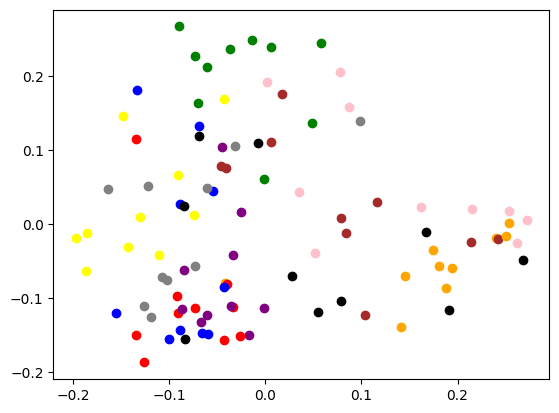

In [15]:
## do PCA on the centroids
# import PCA
from sklearn.decomposition import PCA

pca_centroids = PCA(n_components=2)
pca_centroids.fit(centroids)

pca_centroids_transform = pca_centroids.transform(centroids)

print(pca_centroids_transform.shape)

# plot the centroids

import matplotlib.pyplot as plt

# color each centroid with the color of the parent cluster

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 'grey']

for i in range(100):
    plt.scatter(pca_centroids_transform[i,0], pca_centroids_transform[i,1], color=colors[reverse[i]])

plt.show()

In [16]:
print(y.shape)
print(np.max(y))

(49984,)
99


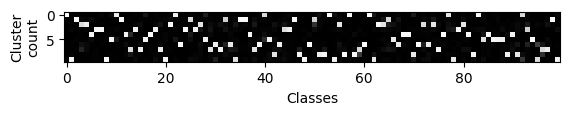

In [17]:
import matplotlib.pyplot as plt

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
#plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(centroids.shape[0]))
plt.imshow(a,cmap='Greys_r')

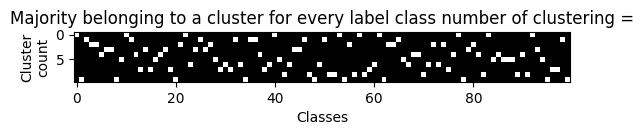

In [18]:
## majority voting for each class
b = np.argmax(a, axis=0)

c = np.zeros((10,100))
for x in range(100):    
    c[b[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(c, cmap='Greys_r')

In [19]:
np.sum(c, axis=1)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [20]:
false_negative = np.ma.array(a,mask=c)
sum_fn = np.sum(false_negative)
print(sum_fn/y.shape[0])

0.12776088348271447


In [21]:
with open('embeddings_all_l0.9_test.pkl', 'rb') as file:
    data = pickle.load(file)

x_test = data["outputs"].cpu().numpy()
y_test = data["labels"].cpu().numpy()
print(x_test.shape)
print(y_test.shape)

print(y_test[:30])

(10000, 344)
(10000,)
[17 75 46  0 96 27 65 13 87 68  4 13  2 32 85 23 71 63 50 41 32 17 97 32
 95 26 61 62 51  1]


In [22]:
# for each embedding fint the closest centroid
embeddings_test = np.array((x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test)))

In [29]:
# for each embedding fint the closest centroid

at = np.zeros((10,100))

for i, x in enumerate(embeddings_test):     
    distances = np.linalg.norm(centroids - x, 1, axis=1)
    first_index = np.argsort(distances)[0]        
    at[reverse[first_index]][y_test[i]] += 1

In [30]:
print(y_test[:20])

[17 75 46  0 96 27 65 13 87 68  4 13  2 32 85 23 71 63 50 41]


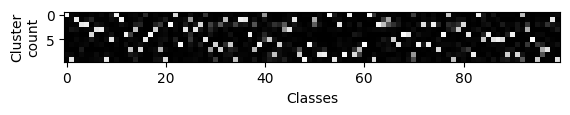

In [31]:

import matplotlib.pyplot as plt

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
#plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(centroids.shape[0]))
plt.imshow(at,cmap='Greys_r')

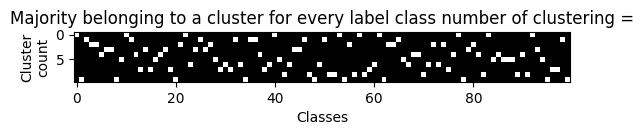

In [32]:
## majority voting for each class
bt = np.argmax(a, axis=0)

ct = np.zeros((10,100))
for x in range(100):    
    ct[bt[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(ct, cmap='Greys_r')

In [35]:
np.sum(ct, axis=1)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [37]:
false_negative = np.ma.array(at,mask=ct)
sum_fn = np.sum(false_negative)
print(sum_fn/y_test.shape[0])

0.2328
